# Classification with Logistics Regression using SKLearn


In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

### Data Generator

In [2]:
def load_dataset(dataset = "noisy_moons"):  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    
    
    datasets = {"noisy_circles": noisy_circles,"noisy_moons": noisy_moons,
                "blobs": blobs,"gaussian_quantiles": gaussian_quantiles}
    
    if (dataset=="planar"):
        np.random.seed(1)
        m = 400 # number of examples
        N = int(m/2) # number of points per class
        D = 2 # dimensionality
        X = np.zeros((m,D)) # data matrix where each row is a single example
        Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
        a = 4 # maximum ray of the flower

        for j in range(2):
            ix = range(N*j,N*(j+1))
            t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
            r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
            X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            Y[ix] = j

        X = X.T
        Y = Y.T
    else:
        X, Y = datasets[dataset]
        X, Y = X.T, Y.reshape(1, Y.shape[0])

    # make blobs binary
    if dataset == "blobs":
        Y = Y%2
        
    return  X, Y


### Plotting Decision Boundary

In [3]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.05
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :].flatten(), X[1, :].flatten(), c=y.flatten(), cmap=plt.cm.Spectral)
    

## Dataset ##

In [4]:
np.random.seed(1) # set a seed so that the results are consistent
#Optioins for dataset "planar","noisy_circles","noisy_moons","blobs","gaussian_quantiles"
X, Y = load_dataset("blobs") 

### Visualize the dataset

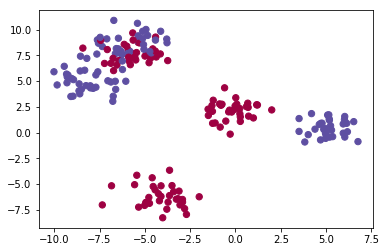

In [5]:
# Visualize the data:
plt.scatter(X[0, :].flatten(), X[1, :].flatten(), c=Y.flatten(), s=40, cmap=plt.cm.Spectral);

## Simple Logistic Regression

In [6]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV(cv=5);
clf.fit(X.T, Y.flatten());

## Plot the decision boundary

Accuracy of logistic regression: 60 % (percentage of correctly labelled datapoints)


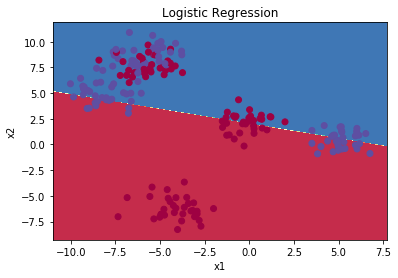

In [7]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracyhttp://localhost:8888/files/Deep_Learning-master/01%20Neural%20Networks%20and%20Deep%20Learning/Week%203/Planar%20data%20classification%20with%20one%20hidden%20layer/images/classification_kiank.png
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")